In [36]:
from sklearn.datasets import load_diabetes
import numpy as np

LEARNING_RATE = 0.05


In [37]:
#(1) 데이터 가져오기
data = load_diabetes()
#2) 모델에 입력할 데이터 X 준비하기
#모델에 예측할 데이터 y 준비하기
df_X = data.data
df_y = data.target
X = np.array(df_X)
y = np.array(df_y)



In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#train 데이터와 test 데이터로 분리하기
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [39]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [40]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [41]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [42]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [43]:
%%timeit -n 1 -r 1

global W, b

losses = []

for i in range(1, 100003):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5695.4914
Iteration 200 : Loss 5380.4983
Iteration 300 : Loss 5110.4100
Iteration 400 : Loss 4878.1755
Iteration 500 : Loss 4677.8880
Iteration 600 : Loss 4504.5977
Iteration 700 : Loss 4354.1544
Iteration 800 : Loss 4223.0768
Iteration 900 : Loss 4108.4428
Iteration 1000 : Loss 4007.7984
Iteration 1100 : Loss 3919.0808
Iteration 1200 : Loss 3840.5548
Iteration 1300 : Loss 3770.7594
Iteration 1400 : Loss 3708.4635
Iteration 1500 : Loss 3652.6281
Iteration 1600 : Loss 3602.3753
Iteration 1700 : Loss 3556.9628
Iteration 1800 : Loss 3515.7611
Iteration 1900 : Loss 3478.2362
Iteration 2000 : Loss 3443.9340
Iteration 2100 : Loss 3412.4674
Iteration 2200 : Loss 3383.5060
Iteration 2300 : Loss 3356.7667
Iteration 2400 : Loss 3332.0067
Iteration 2500 : Loss 3309.0169
Iteration 2600 : Loss 3287.6167
Iteration 2700 : Loss 3267.6500
Iteration 2800 : Loss 3248.9806
Iteration 2900 : Loss 3231.4903
Iteration 3000 : Loss 3215.0751
Iteration 3100 : Loss 3199.6440
Iteration 3200 : 

In [44]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2885.8597786029486

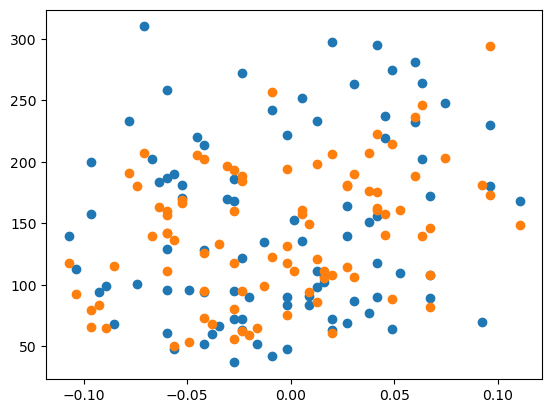

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()